# \[논문\] Modeling Tabular Data using Conditional GAN

김보람  
2023-03-31

# ref

-   [Lei Xu, Maria Skoularidou, Alfredo Cuesta-Infante, Kalyan
    Veeramachaneni, “Modeling Tabular data using Conditional GAN” ,
    NIPS’19, 2019](https://arxiv.org/pdf/1907.00503)

-   [CTGAN model open source](https://github.com/DAI-Lab/CTGAN)

-   [benchmark](https://github.com/DAI-Lab/SDGym)

-   [Shine’s dev log Tstory](https://ddongwon.tistory.com/125)

# Introduction

`-` tabular data GAN

-   likelihood fitness, machine learning efficiency

`-` CTGAN

-   **Conditional GANs for synthetic data generation**

-   **A benchmarking system for synthetic data geration algorithms**

## Related Work

과거에 synthetic data는 랜덤변수, 결합 다변량 분포를 모형화하여 표본을
추출했다.

# Challenges with GANs in Tabular Data Generation Task

-   $N_c$: continuous columns $({C_1, \dots, C_{N_c}})$

-   $N_d$:discrete columns $({D_1, \dots, D_{N_d}})$

-   위 두개는 각각 $random \ variable$이고 아래와 같이 두 변수의
    결합분포를 가진다.

-   $r_j=(c_{1,j},\dots,c_{N_{c,j}},d_{1,j},\dots,d_{N_{d,j}}), \ j \in {1,\dots,n}$

-   table $T$ 는 $N_c, N_d$를 포함한다.

-   data synthesizer $G$를 사용하여 synthetic table $T_{syn}$을 만든다.

-   $T$ is partitioned into training set $T_{train}$ and test set
    $T_{test}$.

`-` $T_{syn}$ 효율성 평가 방법

-   **Likelihood fitness** : Do columns in Tsyn follow the same joint
    distribution as Ttrain?

$T_{syn}$의 columns이 $T_{train}$의 결합분포를 따르는가?

-   **Machine learning efficacy** : When training a classifier or a
    regressor to predict one column using other columns as features, can
    such classifier or regressor learned from Tsyn achieve a similar
    performance on Ttest, as a model learned on Ttrain?

`-` Mixed data types

-   tabula data는 혼합된 경우가 많다.

-   이산형 연속형..

-   GAN은 softmax와 tanh를 사용해야 한다.

`-` Non-Gaussian distributions

-   가우시안 분포를 따르는 것은 min-max transformation을 사용해
    \[-1,1\]로 표준화 한다.

-   연속형 변수는 비가우시안 분포를 사용?

`-` Multimodal distributions

`-` Learning from sparse one-hot-encoded vectors

-   synthetic sample은 softmax를 사용하여 생성한다.

-   real data는 one-hot vector를 이용한다.

`-` Highly imbalanced categorical columns

# CTGAN Model

`-` mode-specific normalization을 사용하여 non-Gaussian과 multimodal
distribution를 해결한다.

`-` `contidional generator`, `training-by-sampling` 를 통해
불균형이산형(`imbalanced discrete columns`) 열들을 해결한다.

## Notations

– $x_1 \oplus x_2 \oplus \dots$: concatenate vectors $x_1, x_2, \dots$

– $gumbel_{\gamma} (x)$: apply Gumbel softmax with parameter $\gamma$ on
a vector $x$

– $leaky_{\gamma}(x)$: apply a leaky ReLU activation on $x$ with leaky
ratio $\gamma$

– $FC_{u \to v}(x)$: apply a linear transformation on a $u$-dim input to
get a $v$-dim output.

이 외에도 tanh, ReLU, softmax, BN, drop 등을 사용한다.

## Mode-specific Normalization

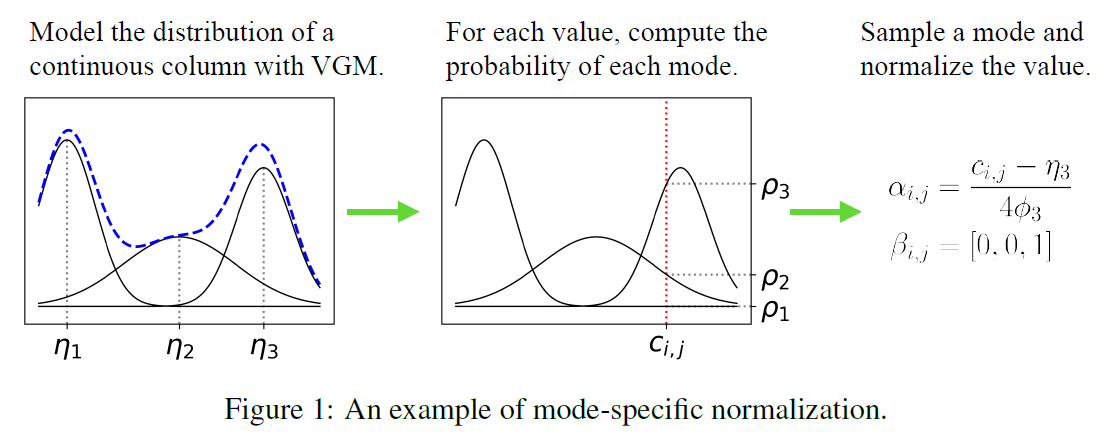

1.  연속형 변수 $C_i$는 variational Gaussian mixture model(VGM) 을
    사용한다.

위 예시에서 VGM은 $\eta_1,\eta_2,\eta_3$인 $m_i=3$인 mode를 찾는다.

Gaussian mixture =
$\mathbb{P}_{C_i}(c_{i,j}) = \sum_{k=1}^3 \mu_k N (c_{i,j}: \eta_k, \phi_k)$

$\mu_k, \phi_k$ 의 가중치와 분산은 각각 구해놓는다.

1.  $c_{i,j}$의 확률밀도함수는 각각 $\rho_1, \rho_2, \rho_3$이다.

s.t $\rho_k = \mu_k N(c_{i,j}: \eta_k, \phi_k)$

1.  3번째 mode를 선택한다. 원핫인코딩을 통해서
    $c_{i,j} \to \beta_{i,j}=[0,0,1]$로 바꾼다.

그리고 $\alpha_{i,j}= \dfrac{c_{i,j}0 - \eta_3}{4\phi_3}$ 가중치를
곱한다.

연속형과 이산형 열들을 바꿔준다.

$r_j = \alpha_{1,j}\oplus \beta_{1,j}\oplus \dots \oplus \alpha_{N_{c,j}} \oplus \beta_{N_{c,j}} \oplus d_{1,j} \oplus \dots \oplus d_{N_{d,j}}$

## Conditional Generator and Training-by-Sampling

***class imbalance***

만약 훈련 데이터가 랜덤샘플에서 훈련된다면 열은 적은카테고리를 가지고
있는 분류를 충분히 대표할수 없다.

이 문제를 the conditional vector, the generator loss, the
training-by-sampling method를 이용해 해결하자.

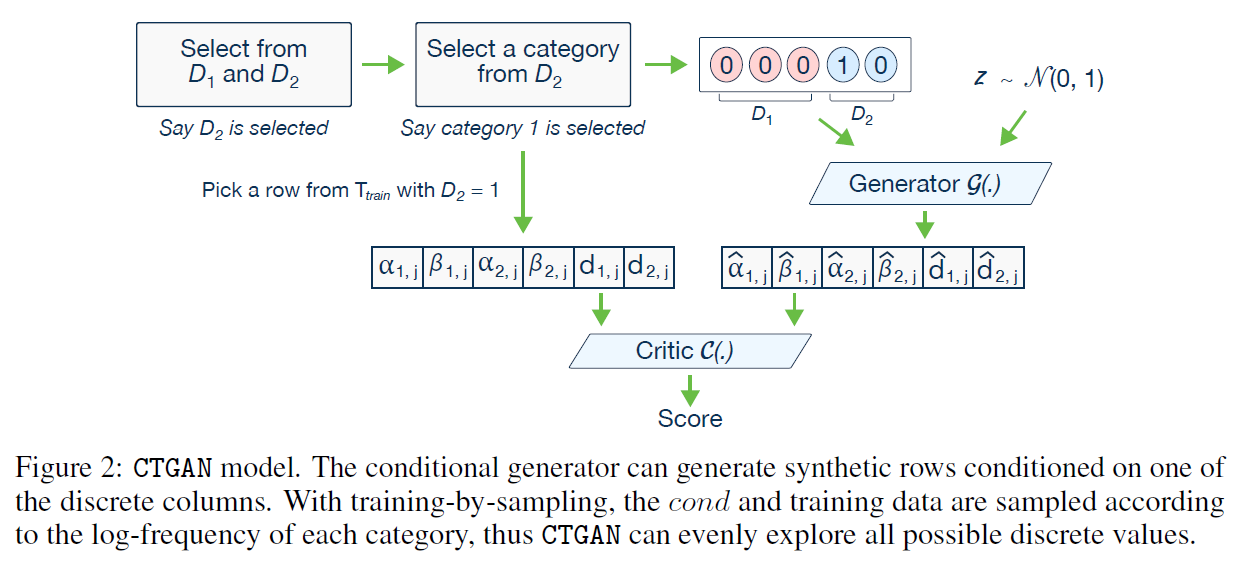

### Conditional vector

이산형 분포인 $D_{N_d}$를 원핫인코딩을 통해 $d_{N_d}$로 바꾼다.

For instance, for two discrete columns,D1 = f1, 2, 3g and D2 = f1,
2g,the condition (D2 = 1) is expressed by the mask vectors m1 = \[0, 0,
0\] and m2 = \[1, 0\]; so cond = \[0, 0, 0, 1, 0\].

### Generator loss

### Training-by-sampling

`-` Figure2

$m_i^{(k)} = I(if i=i^* \  and \ k=k^*)$

1.  $D_2$ 열을 선택한다. 즉 $i^*=2$이다.

2.  $D_2$에서 첫번째를 선택한다. 즉 $k^*=1$이다.

3.  $m_1=[0,0,0], m_2=[1,0], cond=[0,0,0,1,0]$

## Network Structure

### generator $\mathbb{g}(z,cond)$

-   $h_0 = z \oplus cond$

-   $h_1 = h_0 \oplus ReLU(BN(FC_{|cond|+|z| \to 256}(h_0)))$

-   $h_2 = h_1 \oplus ReLU(BN(FC_{|cond|+|z|+256 \to 256}(h_1)))$

-   $\widehat \alpha_i = tanh(FC_{|cond|+|z|+512 \to 1}(h_2)),  \ 1 \leq i \leq N_c$

-   $\widehat \beta_i = gumbel_{0.2}(FC_{|cond|+|z|+512 \to m_i} (h_2)),  \ 1 \leq i \leq N_c$

-   $\widehat d_i = gumbel_{0.2}(FC_{|cond|+|z|+512 \to |D_i|}(h_2)),  \ 1 \leq i \leq N_c$

### critic $C(r_1,\dots,r_{10},cond_1,\dots,cond_{10})$

`-` use PacGAN with 10 samples in each pac to prevent mode collapse

-   $h_0 = r_1 \oplus \dots \oplus r_{10} \oplus cond_1  \oplus \dots  \oplus cond_{10}$

-   $h_1 = drop(leaky_{0.2}(FC_{10|r|+10|cond| \to 256}(h_0)))$

-   $h_2 = drop(leaky_{0.2}(FC_{256 \to 256}(h_1)))$

-   $C(\cdot) = FC_{256 \to 1}(h_2)$

Adam optimaizer 사용한 학습률 $2·10^{-4}$

## TVAE Model

`-` TVAE generator

-   $h_1 = ReLU(FC_{128 \to 128}(z_j))$

-   $h_2 = ReLU(FC_{128 \to 128}(h_1))$

-   $\bar \alpha _{i,j} = tanh(FC_{128 \to 1}(h_2)) \ , \ 1 \leq i \leq N_c$

-   $\widehat \alpha_{i,j} \sim N(\bar \alpha_{i,j} , \delta_i) \ , \ 1 \leq i \leq N_c$

-   $\widehat \beta_{i,j} \sim softmax(FC_{128 \to m_i} (h_2)) \ , \ 1 \leq i \leq N_c$

-   $\widehat d_{i,j} \sim  softmax(FC_{128 \to |D_i|}(h_2)) \ , \ 1 \leq i \leq N_d$

-   $p_\theta(r_j|z_j) = \Pi_{i=1}^{N_c} \mathbb{P}(\widehat \alpha_{i,j} = \alpha_{i,j}) \Pi_{i=1}^{N_c} \mathbb{P}(\widehat \beta_{i,j} = \beta_{i,j}) \Pi_{i=1}^{N_d} \mathbb{P}(\widehat \alpha_{i,j} = \alpha_{i,j})$

$\widehat \alpha_{i,j}, \widehat \beta_{i,j}, \widehat d_{i,j}$ : random
variable

$p_\theta(r_j|z_j)$ : joint distribuion

TVAE를 Adam으로 학습한 학습률: $1e^{-3}$

# Benchmarking Synthetic Data Generation Algorithms

## Baselines and Datasets

### simulated data

-   오라클 S로부터 $T_{train}, T_{test}$을 만든다.

-   이 오라클은 가우시안 혼합 모델 또는 베이지안 네트워크이다.

-   GridR:각 모드에 랜덤 오프셋을 추가

-   베이지안 네트워크: alarm, child, asia, insurance를 사용

### real datasets

-   UCI머신러닝에서 사용되는 6개 사용

-   adult, census, covertype, intrusion,news

-   MNIST 사용

## Evaluation Metrics and Framework

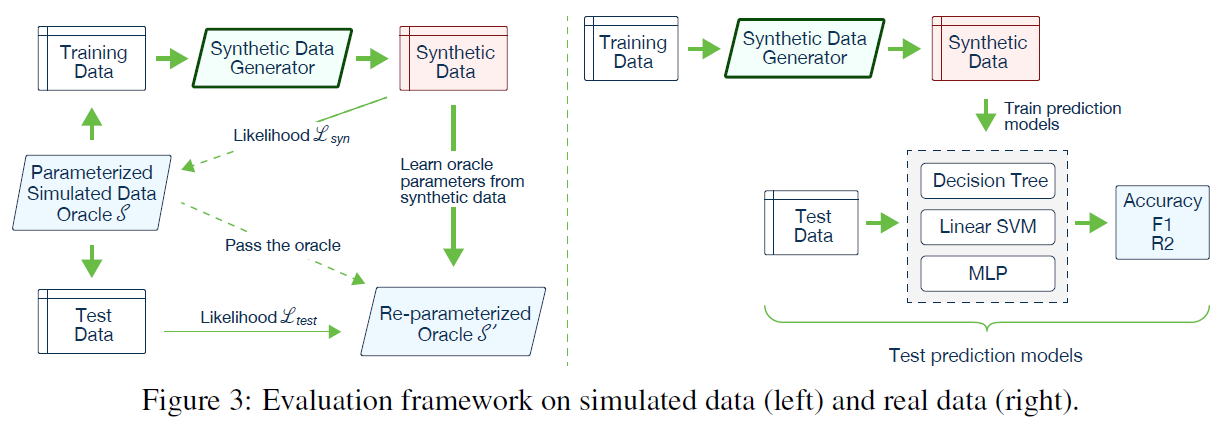

### Likelihood fitness metric

-   simulated data 사용

-   \$T\_{syn} L\_{syn},T\_{test} L\_{test}, \$

-   $L_{syn}$이 과적합되는 문제를 해결하기 위하 $L_{test}$를 사용

### Machine learning efficacy

-   real dataset 사용

-   accruracy와 F1, $\mathbb{R^2}$ 측정

## Benchmarking Results

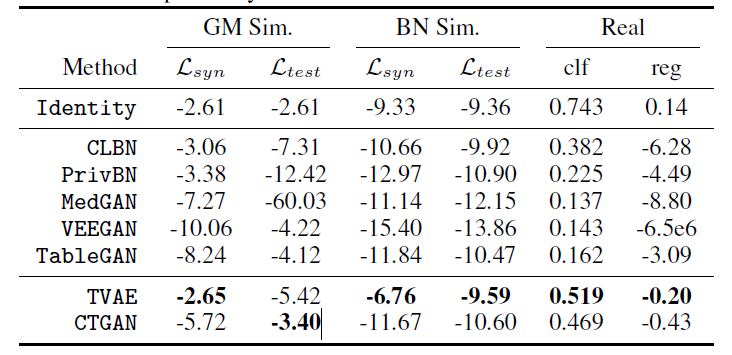

-   GM Sim : Gaussian mixture

-   BN Sim : Bayesian networks

-   TVAE가 CTGAN보다 우수한 편이지만 privacy해결은 못하므로
    privacy생각하면 CTGAN사용..

# Dataset Details

– Adult: http://archive.ics.uci.edu/ml/datasets/adult

– Census: https://archive.ics.uci.edu/ml/datasets/census+income

– Covertype: https://archive.ics.uci.edu/ml/datasets/covertype

– Credit: https://www.kaggle.com/mlg-ulb/creditcardfraud

– Intrusion: http://archive.ics.uci.edu/ml/datasets/kdd+cup+1999+data

– MNIST: http://yann.lecun.com/exdb/mnist/index.html

– News: https://archive.ics.uci.edu/ml/datasets/online+news+popularity

# 사용예시

In [10]:
#pip install ctgan

In [8]:
from ctgan import CTGAN
from ctgan import load_demo

real_data = load_demo()

# Names of the columns that are discrete
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)

# Create synthetic data
synthetic_data = ctgan.sample(1000)

In [9]:
synthetic_data